In [1]:

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations

from shutil import copyfile
rcParams['figure.figsize'] = 25, 10

np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.get_dictionaries import get_all_atoms_4
from codes.otherfunctions.get_grads import get_grads
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
from codes.otherfunctions.multiplot import plot_dot_distributions
from codes.otherfunctions.multirun import get_cosines
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
from codes.otherfunctions.multiplot import highlight_cell

#set parameters
n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 0.05 #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
natoms = 9
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#run experiment
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
nreps = 25
lambda_max = 1
max_search = 30

#folder = workingdirectory + '/Figures/rigidethanol/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
#os.mkdir(folder)

src = workingdirectory + '/codes/experiments/rigidethanol_110120_nsel100_nreps25_var0.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)

new_MN = True
new_grad = True
savename = 'rigidethanol_110120_alltorsions'
savefolder = 'rigidethanol'
loadfolder = 'rigidethanol'
loadname = 'rigidethanol_110120_alltorsions'
if new_MN == True:
    experiment = RigidEthanolPCA(dim, cor, var, ii, jj, cores, False, atoms4)
    experiment.M, experiment.Mpca, projector = experiment.generate_data(noise=False)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)
    # with open(workingdirectory + '/untracked_data/embeddings/' + savefolder + '/' + savename + '.pkl' ,
    #          'wb') as output:
    #      pickle.dump(experiment, output, pickle.HIGHEST_PROTOCOL)



/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:

from codes.otherfunctions.get_dictionaries import get_atoms_4

In [3]:

from codes.otherfunctions.get_dictionaries import get_all_atoms_4

In [4]:
#atoms4,p = get__all_atoms_4(natoms,ii,jj)
atoms4,p = get_all_atoms_4(natoms)

In [5]:
plt.scatter(experiment.N.data[:,0], experiment.N.data[:,1],)

In [6]:
import matplotlib.pyplot as plt
from megaman.embedding import spectral_embedding
from megaman.geometry import Geometry
from megaman.geometry import RiemannMetric
from scipy import sparse
from scipy.sparse.linalg import norm
from mpl_toolkits.mplot3d import proj3d

In [7]:
tp  = np.load('/Users/samsonkoelle/re_full.npy')

In [74]:
pairs = np.asarray(np.where(tp >1))

In [12]:
pun = np.unique(pairs)

In [63]:
atoms4[199]

array([2, 0, 6, 7])

In [81]:
atoms4[721]

array([6, 3, 7, 8])

In [72]:
pairs = np.asarray(np.where(tp >0))

In [79]:
tp[199, 721]

2.0

In [76]:
pairs

array([[199, 649],
       [721, 650]])

In [14]:
gunits = {}
for pr in range(len(pun)):
    print(pr)
    gunits[pun[pr]] = experiment.get_g_full_sub(experiment.M.data, atoms4[pun[pr]])#np.asarray([6, 4, 7, 8]))#np.asarray([2, 0, 6, 7]))

0
1
2
3


In [ ]:
pairs[m][0]

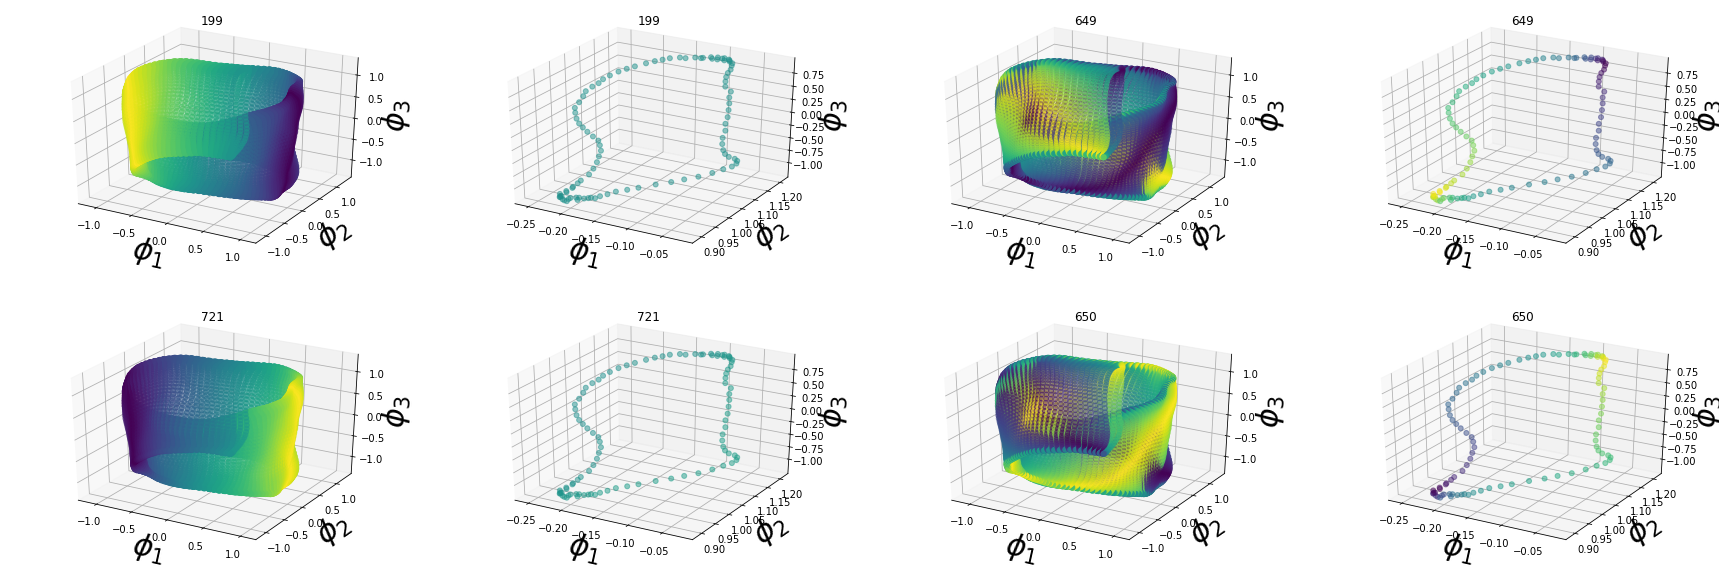

In [80]:
%matplotlib inline
fig, axs = plt.subplots(2,4, figsize = (30,10))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

for m in range(2):
    for n in range(4):
        axs[m,n].set_axis_off()
for m in range(2):
    ax = fig.add_subplot(2, 4, 1 + 4*m, projection='3d')
    c = gunits[pairs[m][0]]
    #axes[0,0] = 
    selected_points = list(range(10000))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    ax.set_title(str(pairs[m][0]))
    ax = fig.add_subplot(2, 4, 2 + 4*m, projection='3d')
    c = gunits[pairs[m][0]]
    #axes[0,0] = 
    selected_points = list(range(100))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    ax.set_title(str(pairs[m][0]))
    ax = fig.add_subplot(2, 4, 3 + 4*m, projection='3d')
    c = gunits[pairs[m][1]]
    #axes[0,0] = 
    selected_points = list(range(10000))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    ax.set_title(str(pairs[m][1]))
    ax = fig.add_subplot(2, 4, 4 + 4*m, projection='3d')
    c = gunits[pairs[m][1]]
    #axes[0,0] = 
    selected_points = list(range(100))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    ax.set_title(str(pairs[m][1]))
    #fig.set_clim(0,np.pi)

In [ ]:
replica

In [15]:
pun

array([199, 649, 650, 721])

In [26]:
gunits[pairs[m][0]].min()

0.0006285252362074036

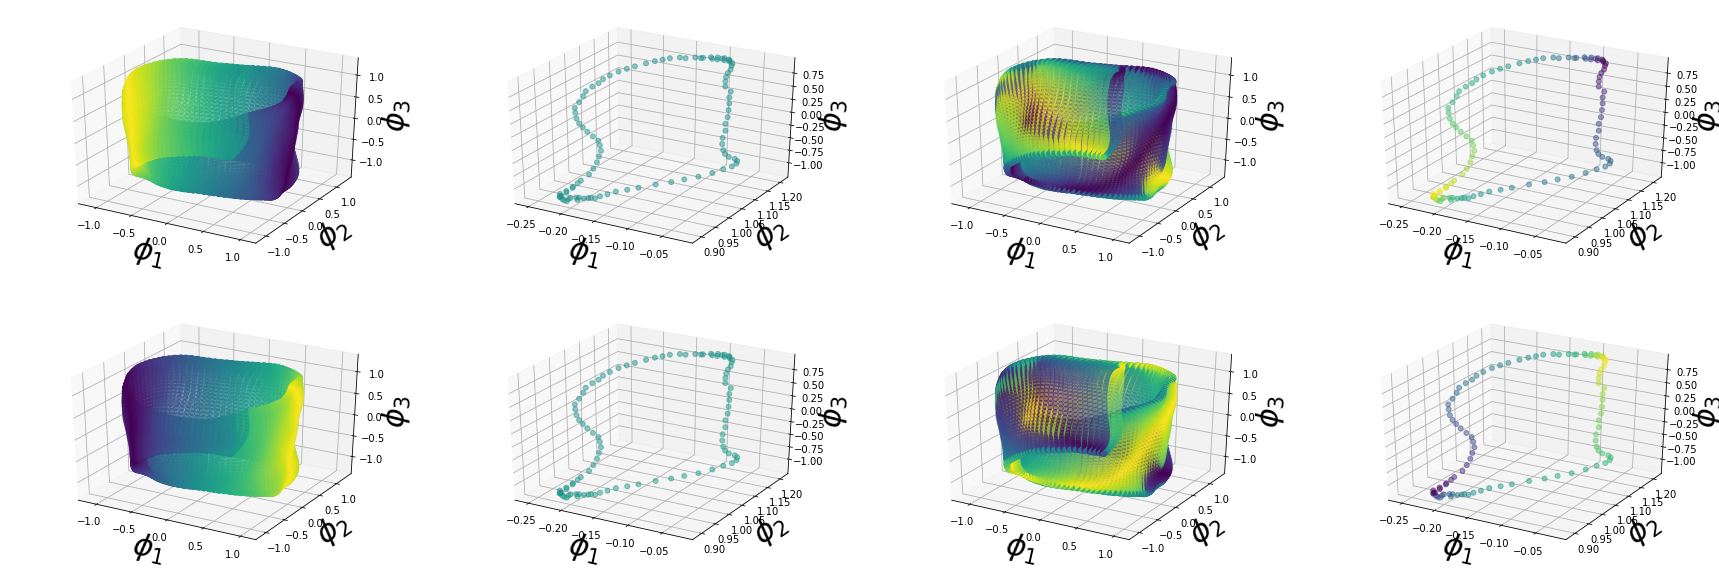

In [49]:
%matplotlib inline
fig, axs = plt.subplots(2,4, figsize = (30,10))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

for m in range(2):
    for n in range(4):
        axs[m,n].set_axis_off()
for m in range(2):
    ax = fig.add_subplot(2, 4, 1 + 4*m, projection='3d')
    c = gunits[pairs[m][0]]
    #axes[0,0] = 
    selected_points = list(range(10000))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    
    ax = fig.add_subplot(2, 4, 2 + 4*m, projection='3d')
    c = gunits[pairs[m][0]]
    #axes[0,0] = 
    selected_points = list(range(100))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    
    ax = fig.add_subplot(2, 4, 3 + 4*m, projection='3d')
    c = gunits[pairs[m][1]]
    #axes[0,0] = 
    selected_points = list(range(10000))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    
    ax = fig.add_subplot(2, 4, 4 + 4*m, projection='3d')
    c = gunits[pairs[m][1]]
    #axes[0,0] = 
    selected_points = list(range(100))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    #fig.set_clim(0,np.pi)

In [50]:
import random

In [58]:
rando = random.sample(list(range(756)),4)

In [59]:
rando

[394, 430, 41, 265]

In [60]:
#gunits = {}
for pr in range(4):
    print(pr)
    gunits[rando[pr]] = experiment.get_g_full_sub(experiment.M.data, atoms4[rando[pr]])#np.asarray([6, 4, 7, 8]))#np.asarray([2, 0, 6, 7]))

0
1
2
3


In [62]:
%matplotlib inline
fig, axs = plt.subplots(2,4, figsize = (30,10))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

for m in range(2):
    for n in range(4):
        axs[m,n].set_axis_off()
for m in range(2):
    ax = fig.add_subplot(2, 4, 1 + 4*m, projection='3d')
    c = gunits[rando[0+2*m]]
    #axes[0,0] = 
    selected_points = list(range(10000))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    
    ax = fig.add_subplot(2, 4, 2 + 4*m, projection='3d')
    c = gunits[rando[0+2*m]]
    #axes[0,0] = 
    selected_points = list(range(100))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    
    ax = fig.add_subplot(2, 4, 3 + 4*m, projection='3d')
    c = gunits[rando[1+2*m]]
    #axes[0,0] = 
    selected_points = list(range(10000))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    
    ax = fig.add_subplot(2, 4, 4 + 4*m, projection='3d')
    c = gunits[rando[1+2*m]]
    #axes[0,0] = 
    selected_points = list(range(100))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    #fig.set_clim(0,np.pi)

In [61]:
atoms4.shape

(756, 4)

In [42]:
c.max()

3.1414638678430693

In [38]:
    fig, axs = plt.subplots(figsize = (10,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    c = gunits[pairs[m][0]]
    #axes[0,0] = 
    selected_points = list(range(10000))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.')
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    

Text(0.5, 0, '$\\phi_3$')

Text(0.5, 0, '$\\phi_3$')

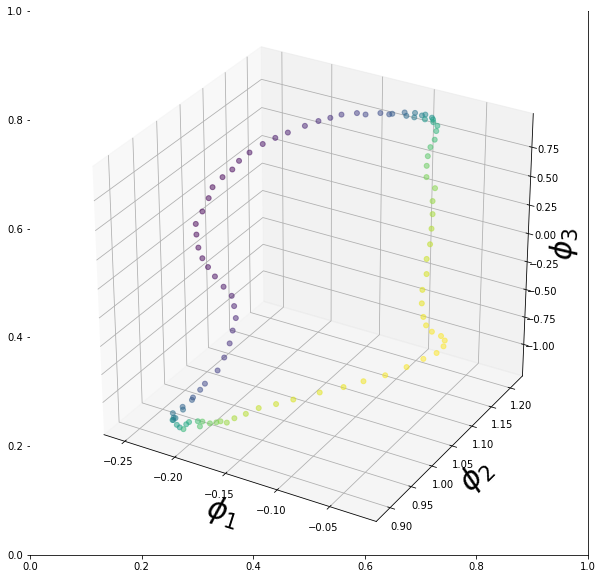

In [39]:
    fig, axs = plt.subplots(figsize = (10,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    c = gunits[pairs[m][0]]
    #axes[0,0] = 
    selected_points = list(range(100))
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, c=c[selected_points], s=s, alpha=alpha, marker='.')
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)
    

In [ ]:
bad_gunits = {}
for pr in range(len(pun)):
    print(pr)
    bad_gunits[pun[pr]] = experiment.get_g_full_sub(experiment.M.data, atoms4[pun[pr]])#np.asarray([6, 4, 7, 8]))#np.asarray([2, 0, 6, 7]))

In [ ]:
%matplotlib inline
selected_points = list(range(10000))
data = experiment.N.data
axes = [0,1,2]
c = gunit
s = 100
alpha = .5
x = data[:, axes[0]][selected_points]
y = data[:, axes[1]][selected_points]
z = data[:, axes[2]][selected_points]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
cax = ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
ax.set_xlabel(r'$\phi_1$', fontsize=30)
ax.set_ylabel(r'$\phi_2$', fontsize=30)
ax.set_zlabel(r'$\phi_3$', fontsize=30)

In [32]:
atoms4[pairs[pr]]

array([[2, 0, 5, 6],
       [2, 0, 5, 6],
       [2, 0, 5, 7],
       [2, 0, 5, 7],
       [2, 0, 5, 7],
       [2, 0, 6, 7],
       [2, 0, 6, 7],
       [2, 0, 6, 7],
       [2, 0, 6, 7],
       [2, 0, 6, 7],
       [8, 2, 0, 7],
       [5, 0, 6, 8],
       [8, 5, 0, 7],
       [8, 6, 0, 7],
       [2, 3, 6, 7],
       [8, 3, 2, 6],
       [2, 4, 5, 7],
       [8, 4, 2, 7],
       [8, 4, 2, 7],
       [5, 2, 6, 8],
       [8, 5, 2, 7],
       [6, 4, 7, 8]])

In [30]:
atoms4.shape

(756, 4)

In [21]:
gunit = experiment.get_g_full_sub(experiment.M.data, np.asarray([5, 2, 6, 8]))#np.asarray([6, 4, 7, 8]))#np.asarray([2, 0, 6, 7]))

Text(0.5, 0, '$\\phi_3$')

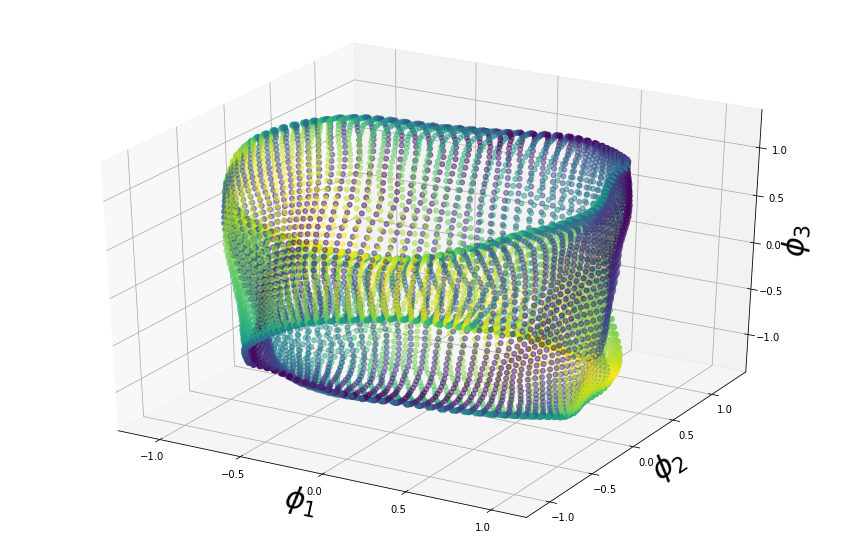

In [22]:
%matplotlib inline
selected_points = list(range(10000))
data = experiment.N.data
axes = [0,1,2]
c = gunit
s = 100
alpha = .5
x = data[:, axes[0]][selected_points]
y = data[:, axes[1]][selected_points]
z = data[:, axes[2]][selected_points]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
cax = ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
ax.set_xlabel(r'$\phi_1$', fontsize=30)
ax.set_ylabel(r'$\phi_2$', fontsize=30)
ax.set_zlabel(r'$\phi_3$', fontsize=30)

In [ ]:
experiment.gs = experiment.get_g_full(experiment.M.data)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-0dbdd682c4fe>", line 1, in <module>
    experiment.gs = experiment.get_g_full(experiment.M.data)
  File "/Users/samsonkoelle/manifoldflasso_jmlr/codes/experimentclasses/AtomicRegression.py", line 181, in get_g_full
    output[i,:] = self.get_g(data[i]).transpose()
  File "/Users/samsonkoelle/manifoldflasso_jmlr/codes/experimentclasses/AtomicRegression.py", line 225, in get_g
    actived[i] = np.where([set(item).issubset(atom4[combos[i, :]]) for item in atoms3])[0][0]
  File "/Users/samsonkoelle/manifoldflasso_jmlr/codes/experimentclasses/AtomicRegression.py", line 225, in <listcomp>
    actived[i] = np.where([set(item).issubset(atom4[combos[i, :]]) for item in atoms3])[0][0]
KeyboardInterrupt

During handling of the above except

KeyboardInterrupt: 

Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwar

In [ ]:
%matplotlib inline
selected_points = list(range(100))
data = experiment.N.data
axes = [0,1,2]
c = experiment.gs[selected_points,1]
s = 100
alpha = 1
x = data[:, axes[0]][selected_points]
y = data[:, axes[1]][selected_points]
z = data[:, axes[2]][selected_points]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
cax = ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
ax.set_xlabel(r'$\phi_1$', fontsize=30)
ax.set_ylabel(r'$\phi_2$', fontsize=30)
ax.set_zlabel(r'$\phi_3$', fontsize=30)
# x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
# fig2 = plt.figure(figsize=plt.figaspect(.5))
# ax2 = fig2.add_subplot(1, 1, 1)
# cax2 = ax2.scatter(x2, y2, c=c, s=s, alpha=alpha, marker='.')
# ax2.set_axis_off()


Text(0.5, 0, '$\\phi_3$')

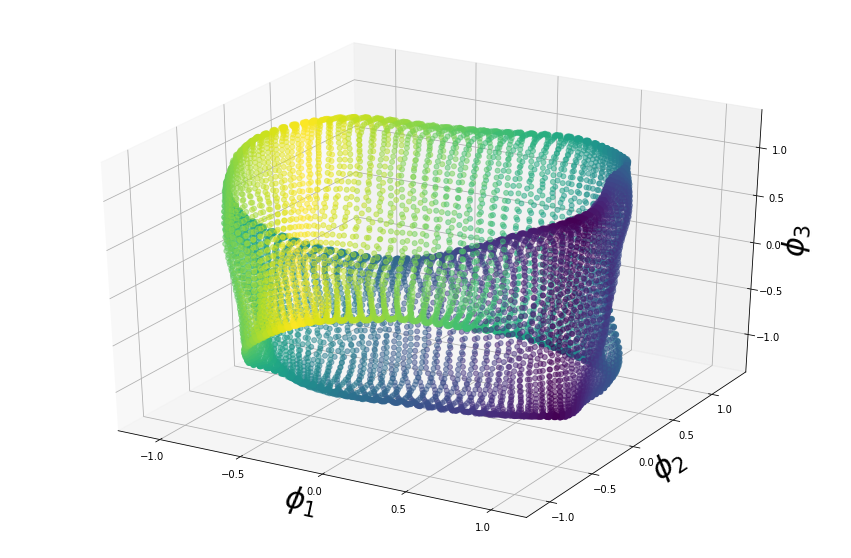

In [8]:
%matplotlib inline
selected_points = list(range(10000))
data = experiment.N.data
axes = [0,1,2]
c = experiment.gs[selected_points,0]
s = 100
alpha = .5
x = data[:, axes[0]][selected_points]
y = data[:, axes[1]][selected_points]
z = data[:, axes[2]][selected_points]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
cax = ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
ax.set_xlabel(r'$\phi_1$', fontsize=30)
ax.set_ylabel(r'$\phi_2$', fontsize=30)
ax.set_zlabel(r'$\phi_3$', fontsize=30)
# x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
# fig2 = plt.figure(figsize=plt.figaspect(.5))
# ax2 = fig2.add_subplot(1, 1, 1)
# cax2 = ax2.scatter(x2, y2, c=c, s=s, alpha=alpha, marker='.')
# ax2.set_axis_off()


In [9]:
def plot_3d(fig, ax,selected_points,data,axes,c,s,alpha):
    
    ax = fig.add_subplot(1,1,1,projection='3d')
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    cax = ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    ax.set_zlabel(r'$\phi_3$', fontsize=30)

In [12]:
%matplotlib inline
selected_points = list(range(10000))
data = experiment.N.data
axes = [0,1,2]
c = experiment.gs[selected_points,1]
s = 100
alpha = .5
# x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
# fig2 = plt.figure(figsize=plt.figaspect(.5))
# ax2 = fig2.add_subplot(1, 1, 1)
# cax2 = ax2.scatter(x2, y2, c=c, s=s, alpha=alpha, marker='.')
# ax2.set_axis_off()


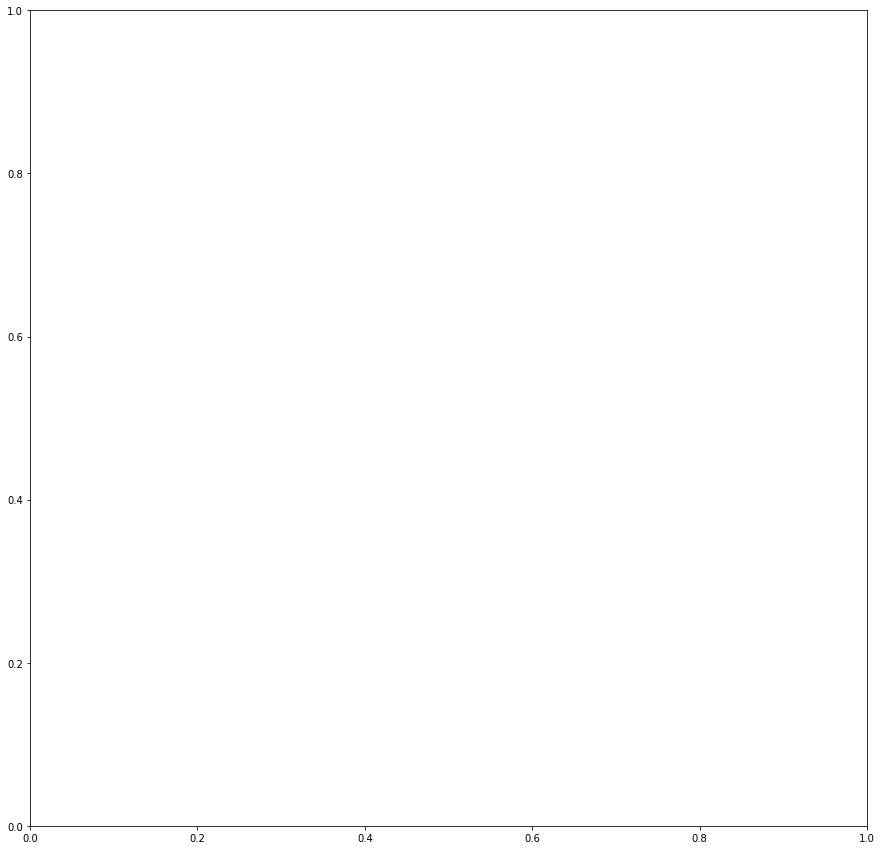

In [13]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize = (15,15))

#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)

arr_diagram = mpimg.imread('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/rediagram.png')

# imgplot = plt.imshow(arr_diagram)
# plt.show()

#plt.grid()

#plt.draw()
#plt.savefig('add_pi

In [14]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/rigidethanol/rigidethanol_110120replicates_fix.pkl' ,
         'rb') as loader:
     replicates_rigidethanol = pickle.load(loader)

In [62]:
def plot_cosines(cosines, ax, colors):
    p = cosines.shape[0]
    sns.heatmap(cosines ,ax = ax)
    for xtick, color in zip(ax.get_xticklabels(), colors):
        xtick.set_color(color)
    for ytick, color in zip(ax.get_yticklabels(), colors):
        ytick.set_color(color)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 500 / p)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 500 / p)
    
    ax.set_ylabel(r"$g_j$", fontsize = 70)
    ax.set_xlabel(r"$g_i$", fontsize = 70)
    #ax.set_title(r"$\text{hi}$")
    ax.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{ij'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_i (\xi_i) \|_2 \| grad_{\mathcal M} g_j(\xi_i) \|_2} $",
                fontsize = 70)
    

def plot_reg_path_ax_lambdasearch_customcolors_norm(ax, coeffs, xaxis,fig, colors):
    p = coeffs.shape[3]
    q = coeffs.shape[1]
    gnames = np.asarray(list(range(p)), dtype=str)

    rcParams['axes.titlesize'] = 30
    plt.rc('text', usetex=True)

    normax = np.sqrt(np.sum(np.sum(np.sum(coeffs ** 2, axis=1), axis=1), axis=1).max())

    for j in range(p):
        toplot = np.linalg.norm(np.linalg.norm(coeffs[:, :, :, j], axis=2), axis=1)
        # axes[0].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
        ax.plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                     color=colors[j], label=gnames[j])

    kkk = xaxis.copy()
    kkk.sort()

    # xupperindex = np.min(np.where(np.sum(np.sum(np.sum(coeffs**2, axis = 1), axis = 1), axis = 1) ==0)[0])

    #for k in range(1 + q):
    ax.tick_params(labelsize=50)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(bottom=0, top=normax)
    # axes[k].set_xlim(left = 0, right = xaxis[xupperindex])
    #if (k == 0):
    tixx = np.hstack(
        [np.asarray([0]), 10 ** np.linspace(math.floor(np.log10(normax)), math.floor(np.log10(normax)) + 1, 2)])
#    if k != 0:
        # axes[k].set_yticks(tixx)
    ax.set_ylabel(r"$\displaystyle \|\hat \beta_{j}\|_2$", fontsize = 70)
    ax.set_xlabel(r"$\lambda  \sqrt{nm}$", fontsize = 70)
    #ylabel = r"$\displaystyle \|\hat \beta_{j}\|_2$"
    #ax.l
    #if k == 0:
    #ax.set_title("Combined", fontdict={'fontsize': 50})
    ax.grid(True, which="both", alpha=True)

    #handles, labels = ax.get_legend_handles_labels()
    #by_label = OrderedDict(zip(labels, handles))
    # fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=50)
    # fig.text(0.05, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=60)
    #fig.subplots_adjust(right=0.75)
    #leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
    #leg_ax.axis('off')
    #leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
    # leg.set_title('Torsion', prop={'size': Function})
    #for l in leg.get_lines():
    #    l.set_alpha(1)
    # fig.savefig(filename + 'beta_paths_n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(
    #    nreps))
    
def plot_watch_custom(to_plot, p, ax,colors):
    #fig, ax = plt.subplots(figsize = (15,15))
    #%matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    #figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    ax.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
        ax.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = r"$g_{{{}}}$".format(j),color=colors[j],#cmap.colors[j],
                  fontdict = {'fontsize' : 70},
                  horizontalalignment='center',
         verticalalignment='center')



        ax.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=colors[j], marker  = 'o', s = 200*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                ax.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    ax.text( x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 40})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')

                #axes.axline((x1, y1), (x2, y2))
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_title(r"$\omega = 25$", fontsize = 100)

In [16]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
        selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

        selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]
    
        return(selected_functions_at_selection_lambda)
    else:
        return(np.asarray([]))

def get_toplot(supports,p,d):
    to_plot = np.zeros(np.repeat(p,d))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            if len(support_indices[i]) > 0:
                #print(tuple(support_indices[i]), to_plot[tuple(support_indices[i])])#, print(to_plot[-1])
                to_plot[tuple(support_indices[i])] += 1

    return(to_plot)

supports_rigidethanol = {}
for i in range(nreps):
    print(i)
    supports_rigidethanol[i] = get_support(replicates_rigidethanol[i].coeffs, dim = 2)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [17]:
toplot_rigidethanol = get_toplot(supports_rigidethanol, 12,2)


In [33]:
def plot_3d(fig, nrows, ncols, pos, ax,selected_points,data,axes,c,s,alpha):
    
    ax_new = fig.add_subplot(1,1,1,projection='3d')
    x = data[:, axes[0]][selected_points]
    y = data[:, axes[1]][selected_points]
    z = data[:, axes[2]][selected_points]
    #fig = plt.figure(figsize=(15,10))
    print(pos, nrows, ncols)
    ax = fig.add_subplot(pos, nrows, ncols, projection='3d')
    ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
    ax.set_xlabel(r'$\phi_1$', fontsize=30)
    ax.set_ylabel(r'$\phi_2$', fontsize=30)
    
    #ax_new.set_zlabel(r'$\phi_3$', fontsize=30)
    
    #x2, y2, _ = proj3d.proj_transform(x, y, z, ax_new.get_proj())
    #fig2 = plt.figure(figsize=plt.figaspect(.5))
    #ax.scatter(x2, y2, c=c, s=s, alpha=alpha, marker='.')
     #         cax = ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
    #         x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
    #         fig2 = plt.figure(figsize=plt.figaspect(.5))
    #         ax2 = fig2.add_subplot(1, 1, 1)
    #         cax2 = ax2.scatter(x2, y2, c=c, s=s, alpha=alpha, marker='.')
   

In [34]:
from mpl_toolkits.mplot3d import proj3d
#from codes.geometer import TangentBundle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [35]:
import matplotlib.pyplot as plt

2 2 3


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/tight_layout.py:345: UserWarning: tight_layout not applied: number of columns in subplot specifications mustbe multiples of one another.
  warnings.warn('tight_layout not applied: '


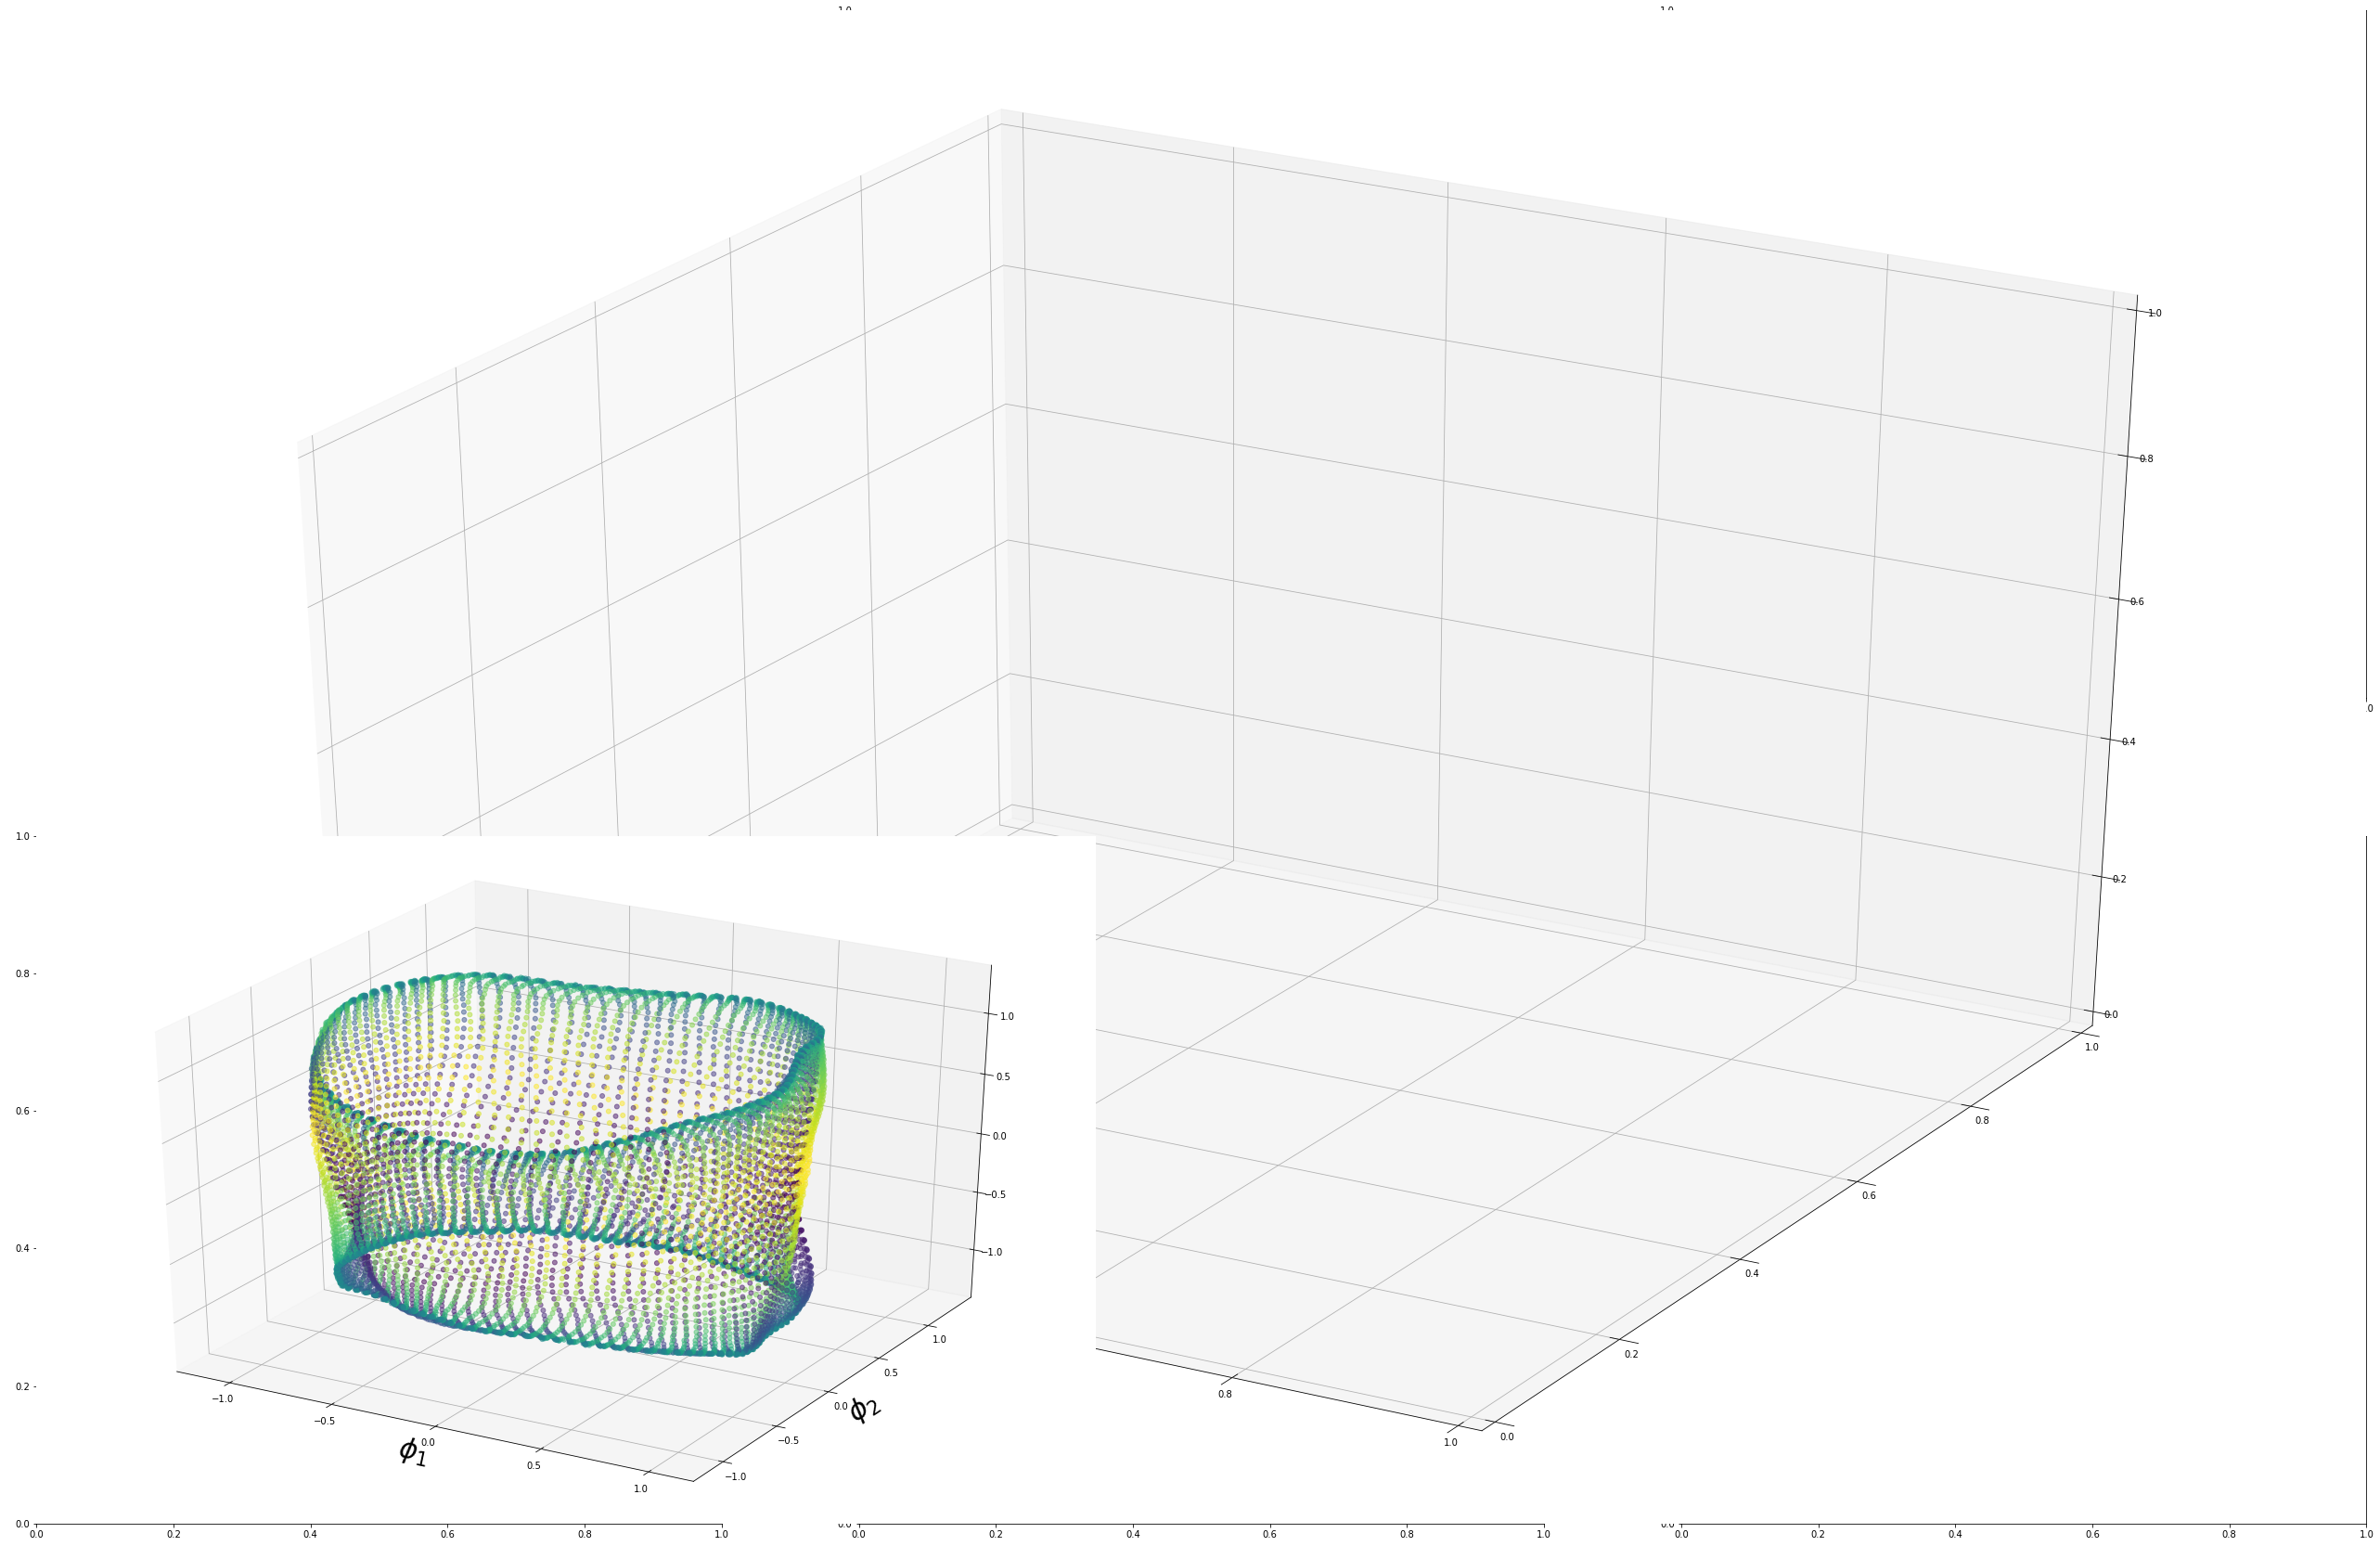

In [37]:
%matplotlib inline
#fig,axes == plt.subplot(3,3,figsize=(15,15))
fig, axes_all = plt.subplots(2,3,figsize=(45,30))

axes_all[0,0].imshow(arr_diagram)
axes_all[0,0].set_axis_off()
plot_3d(fig, 2,3,2, axes_all[0,1],selected_points,data,axes,c,s,alpha)
#plt.imshow(arr_diagram)
# reth_cosine = get_cosines(replicates_rigidethanol[1].dg_M)
# #sns.heatmap(eth_cosine, ax = axes_all[0,0],)
# colors = np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
# plot_cosines(reth_cosine, axes_all[1,0], colors)
# plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[1,1], replicates_rigidethanol[1].coeffs, replicates_rigidethanol[1].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
# plot_watch_custom(toplot_rigidethanol, 12, axes_all[1,2],colors)

#fig.add_subplot(112, projection='3d')

fig.tight_layout()
#plt.savefig('bigwan_re')

In [27]:
axes_all[0,1]

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


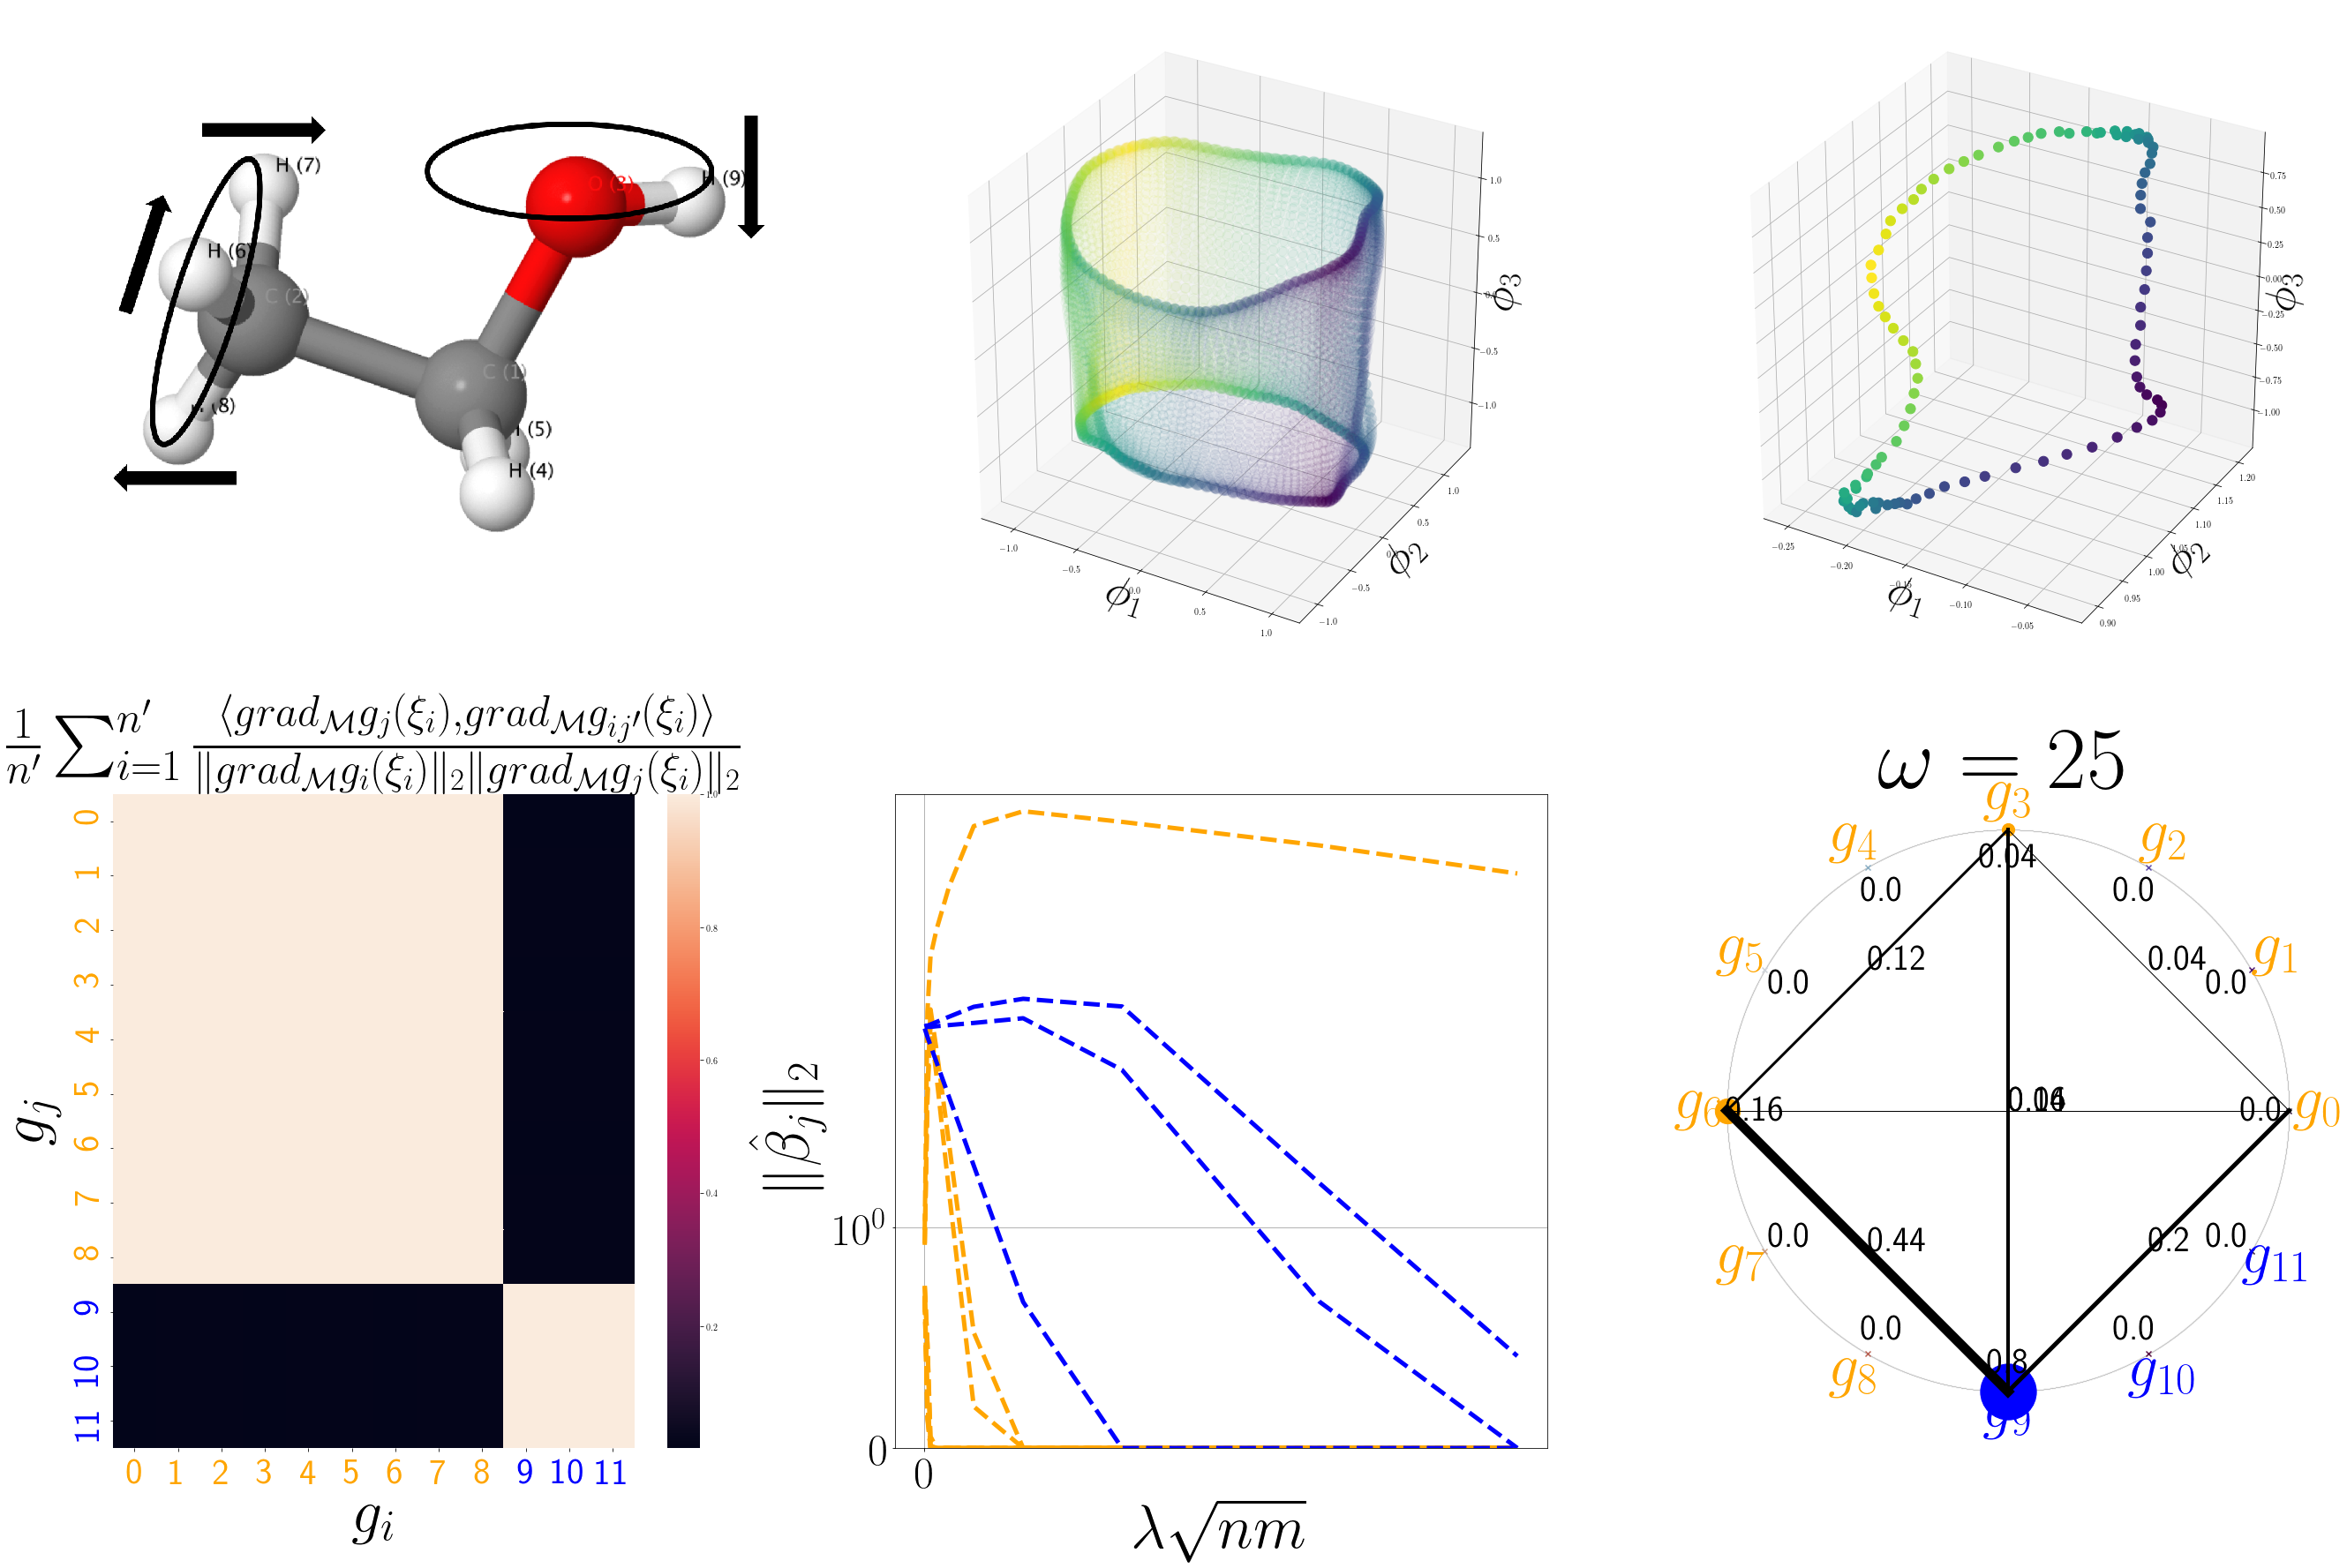

In [66]:
fig, axes_all = plt.subplots(2,3,figsize=(45,30))
axes_all[0,1].set_axis_off()
axes_all[0,2].set_axis_off()
alpha = .05
ax = fig.add_subplot(2, 3, 2, projection='3d')
selected_points = np.asarray(list(range(10000)))
c = experiment.gs[selected_points,0]
x = data[:, axes[0]][selected_points]
y = data[:, axes[1]][selected_points]
z = data[:, axes[2]][selected_points]
#fig = plt.figure(figsize=(15,10))
#print(pos, nrows, ncols)
#ax = fig.add_subplot(pos, nrows, ncols, projection='3d')
ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
ax.set_xlabel(r'$\phi_1$', fontsize=50)
ax.set_ylabel(r'$\phi_2$', fontsize=50)
ax.set_zlabel(r'$\phi_3$', fontsize=50)
    
ax = fig.add_subplot(2, 3, 3, projection='3d')
selected_points = np.asarray(list(range(100)))
alpha = 1
c = experiment.gs[selected_points,1]
s = 500
x = data[:, axes[0]][selected_points]
y = data[:, axes[1]][selected_points]
z = data[:, axes[2]][selected_points]
#fig = plt.figure(figsize=(15,10))
#print(pos, nrows, ncols)
#ax = fig.add_subplot(pos, nrows, ncols, projection='3d')
ax.scatter(x, y, z, c=c, s=s, alpha=alpha, marker='.')
ax.set_xlabel(r'$\phi_1$', fontsize=50)
ax.set_ylabel(r'$\phi_2$', fontsize=50)
ax.set_zlabel(r'$\phi_3$', fontsize=50)
   
    
axes_all[0,0].imshow(arr_diagram)
axes_all[0,0].set_axis_off()
reth_cosine = get_cosines(replicates_rigidethanol[1].dg_M)
#sns.heatmap(eth_cosine, ax = axes_all[0,0],)
colors = np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
plot_cosines(reth_cosine, axes_all[1,0], colors)
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[1,1], replicates_rigidethanol[1].coeffs, replicates_rigidethanol[1].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_rigidethanol, 12, axes_all[1,2],colors)

plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/recombined')

In [49]:
c.shape

(10000,)

In [50]:
experiment.gs[selected_points,1].shape

(100,)